We want to solve the two-dimensional time-independent Schrodinger equation in a square for any potential:

\begin{equation*}
    - \frac{\hbar}{2 m} \left( \frac{\partial ^ 2 \psi (x, y)}{\partial x ^ 2} + \frac{\partial ^ 2 \psi (x, y)}{\partial y ^ 2} \right) + V(x, y) \, \psi (x, y) = E \, \psi(x, y) \quad \text{for} \quad (x, y) \in [0, 1] \times [0, 1]
\end{equation*}

with the boundary condition $\psi (x, y) = 0$ on the edge

In [1]:
# importing libraries
from numpy import linspace, meshgrid, exp, ones, array, where, sum, abs, sqrt
from scipy.sparse import spdiags, kronsum, diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [2]:
# Defining the solver function
def solver(V):
    
    global N, K
    hbar = 1
    m = 1 / 2

    # Preparing the matrices
    diagonal = ones([N])
    diagonals = array([diagonal, -2 * diagonal, diagonal])
    D = spdiags(diagonals, array([- 1, 0, 1]), N, N)
    T = - ((hbar ** 2) / (2 * m)) * kronsum(D, D)
    U = diags(V.reshape(N ** 2), (0))
    H = T + U

    # Solving the equation and getting the first K eigenvalues
    eigenvalues, eigenvectors = eigsh(H, k = K + 1, which = 'SM')

    return (eigenvalues, eigenvectors)

In [3]:
# Plotter function 2D and 3D
def plotter(eigenvalues, eigenvectors):
    
    global x, y, N, K
    
    dx = x[0][1] - x[0][0]

    for n in range(0, K + 1):
        
        psi = eigenvectors.T[n].reshape(N, N)

        # Normalization
        A = sum(abs(psi) ** 2 * dx ** 2)  
        psi = psi / sqrt(A)               
    
        fig = plt.figure(figsize = (14, 7))
    
        # Creating a 2D subplot
        ax1 = fig.add_subplot(121)
        c = ax1.contourf(x, y, psi ** 2, 200, cmap = "inferno")
        fig.colorbar(c, ax = ax1)
        ax1.set_title(f"Probability density for n = {n}", fontweight = "bold", fontsize = 14)
        ax1.set_xlabel("X", fontweight = "bold", fontsize = 10)
        ax1.set_ylabel("Y", fontweight = "bold", fontsize = 10)
        ax1.grid(False)

        # Creating a 3D subplot
        ax2 = fig.add_subplot(122, projection = "3d")
        surf = ax2.plot_surface(x, y, psi, cmap = "magma", edgecolor = "none", antialiased = True, shade = True)
        ax2.set_title(f"Wave function for n = {n} \n E_{n} = {round(eigenvalues[n], 6)}", fontweight = "bold", fontsize = 14)
        ax2.set_xlabel("X", fontweight = "bold", fontsize = 10)
        ax2.set_ylabel("Y", fontweight = "bold", fontsize = 10)
        ax2.set_zticks([])

        fig.colorbar(surf, ax = ax2)

        plt.show()

In [4]:
# Defining the energy spectrum plotting function
def energy_spectrum(eigenvalues):

    plt.figure(figsize = (6, 6))
    [plt.axhline(eigenvalues[j], color = "red") for j in range(0, K + 1)]
    plt.xticks([])
    plt.ylim(min(eigenvalues) - 0.0005, max(eigenvalues) + 0.0005)
    plt.title("Energy spectrum", fontweight = "bold", fontsize = 14)
    plt.ylabel("Energy levels", fontweight = "bold", fontsize = 14)

    return plt.show()

In [5]:
# length of the square
L = 1

# Number of subdivisions
N = 300

# Number of eigenfunctions
K = 10

# Creating the mesh
x = linspace(0, L, N)
y = linspace(0, L, N)
x, y = meshgrid(x, y)

In [6]:
# Defining the potential within the square
V = lambda x, y: exp(- ((x - (L / 3)) ** 2 + (y - (L / 3)) ** 2) / (2 * 0.05 ** 2))
V = V(x, y)

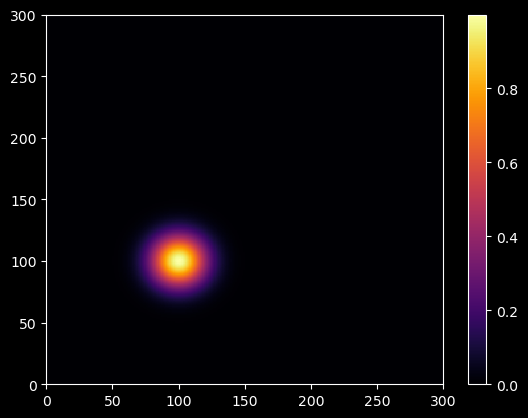

In [7]:
# Showing the potential
plt.pcolormesh(V, cmap = "inferno")
plt.colorbar()
plt.show()

In [8]:
# Solving the Schrodinger equation
eigenvalues, eigenfunctions = solver(V)

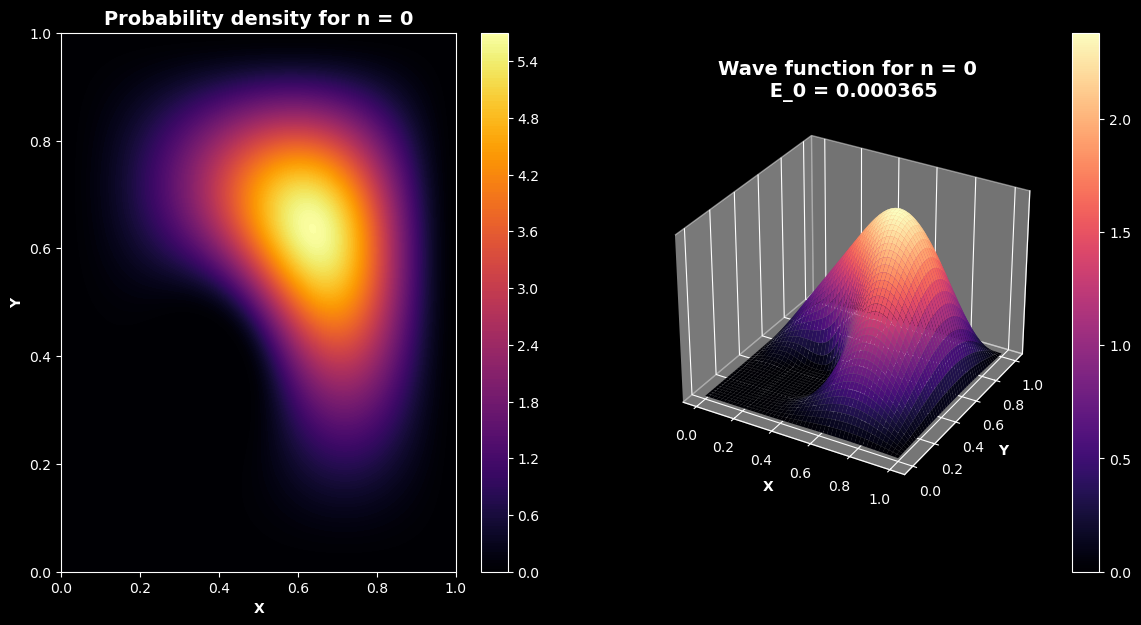

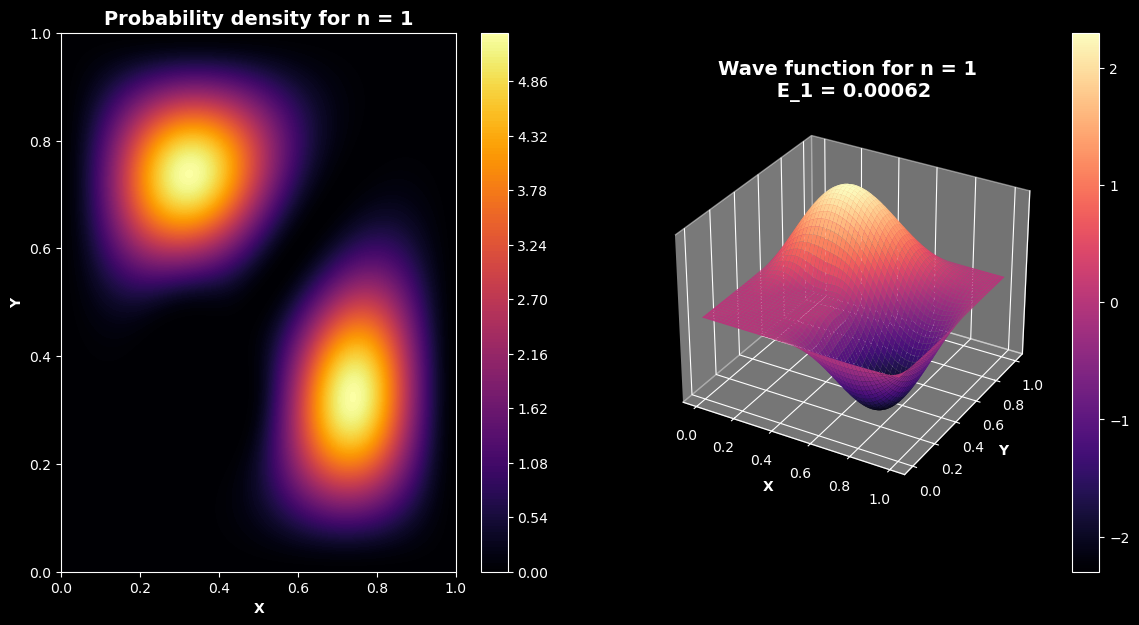

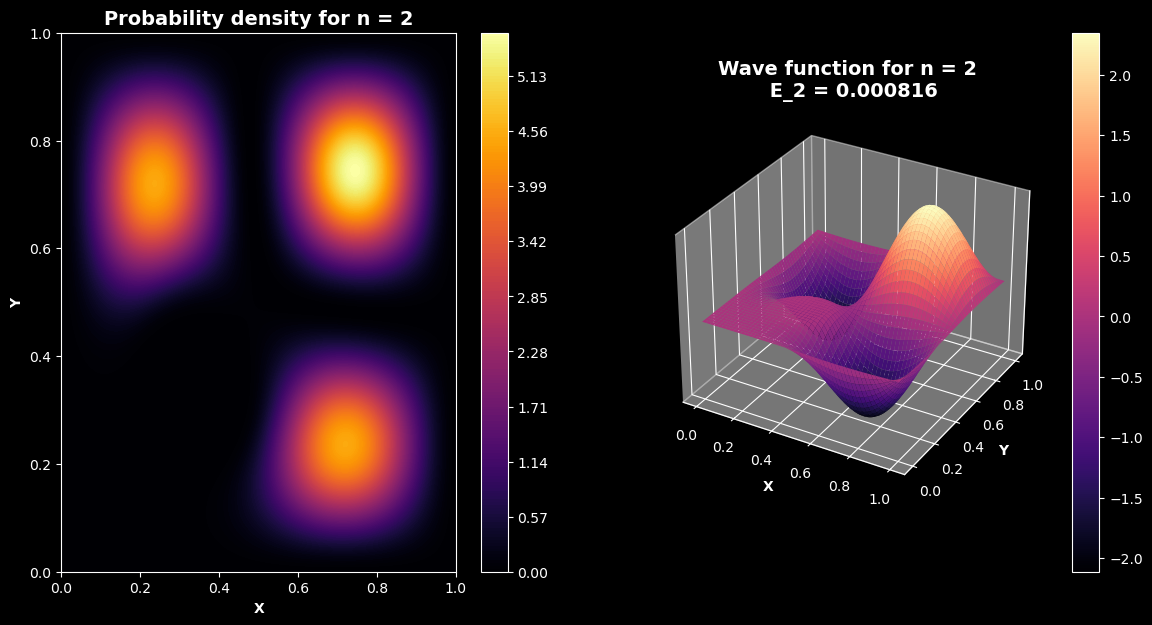

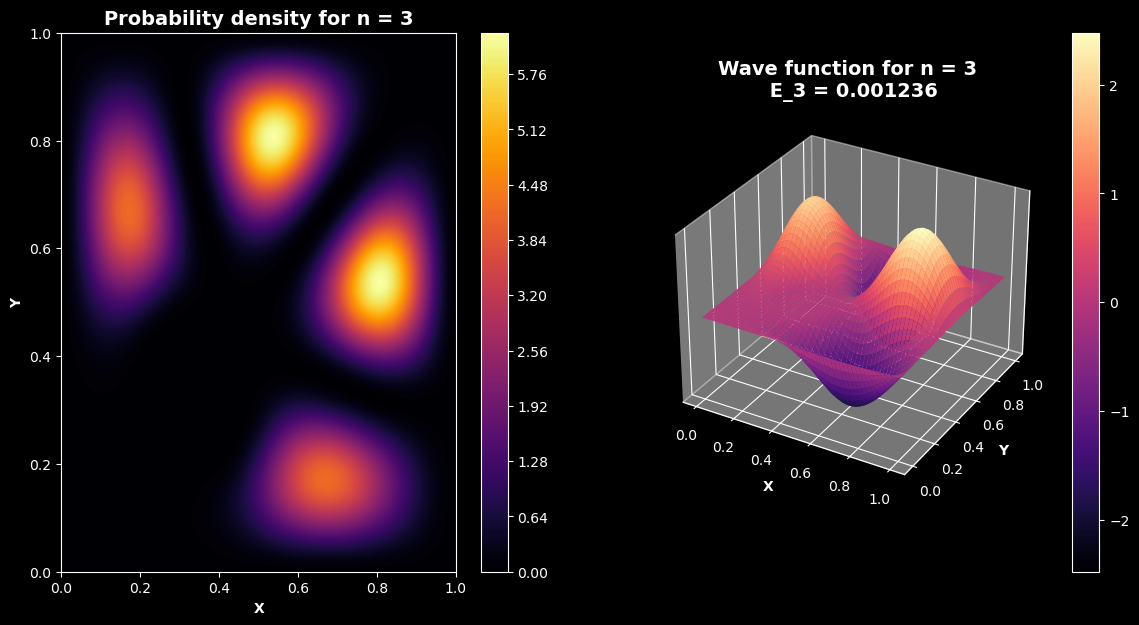

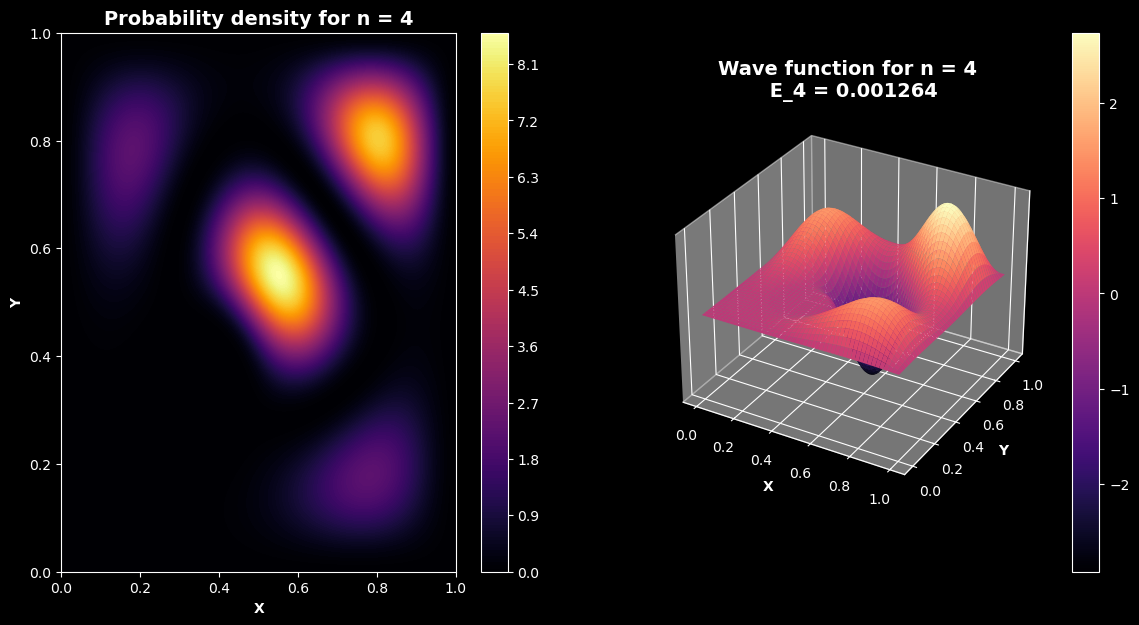

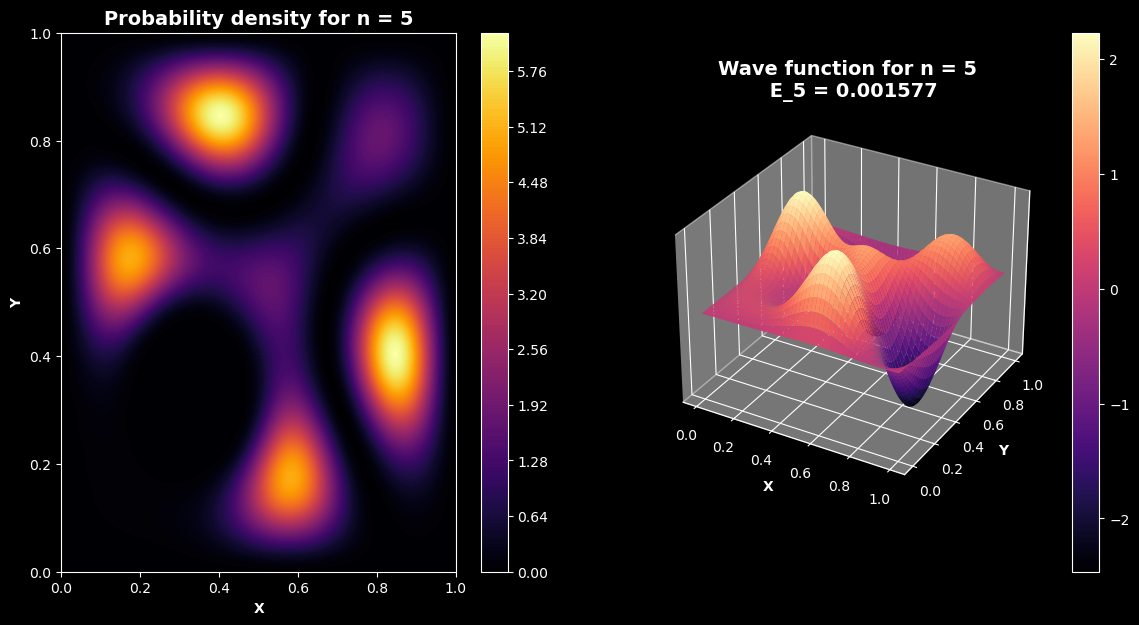

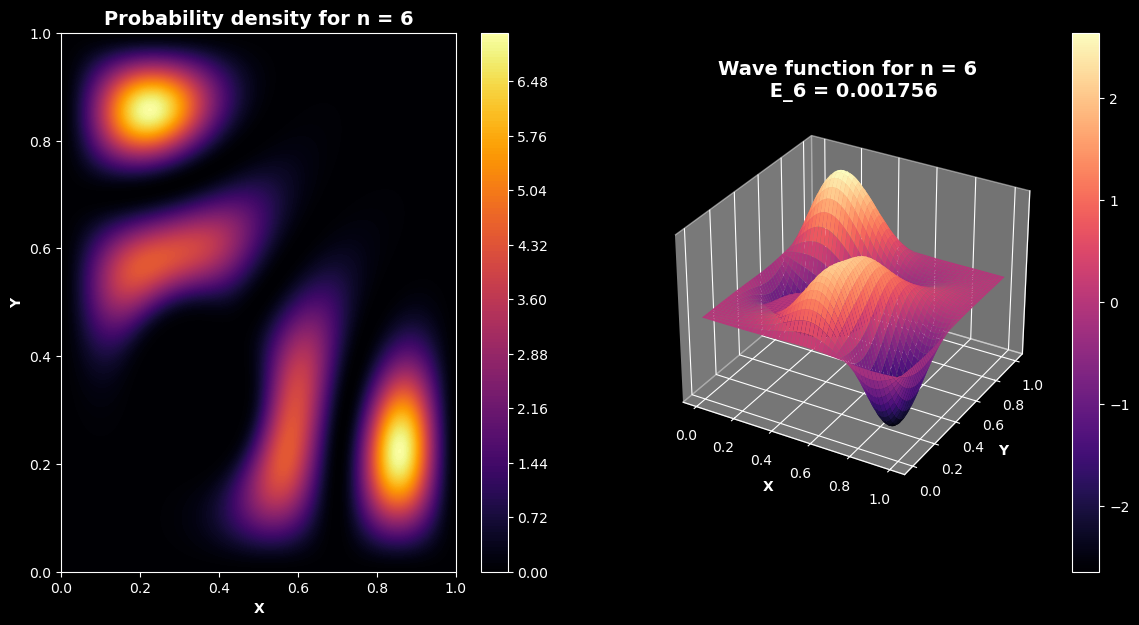

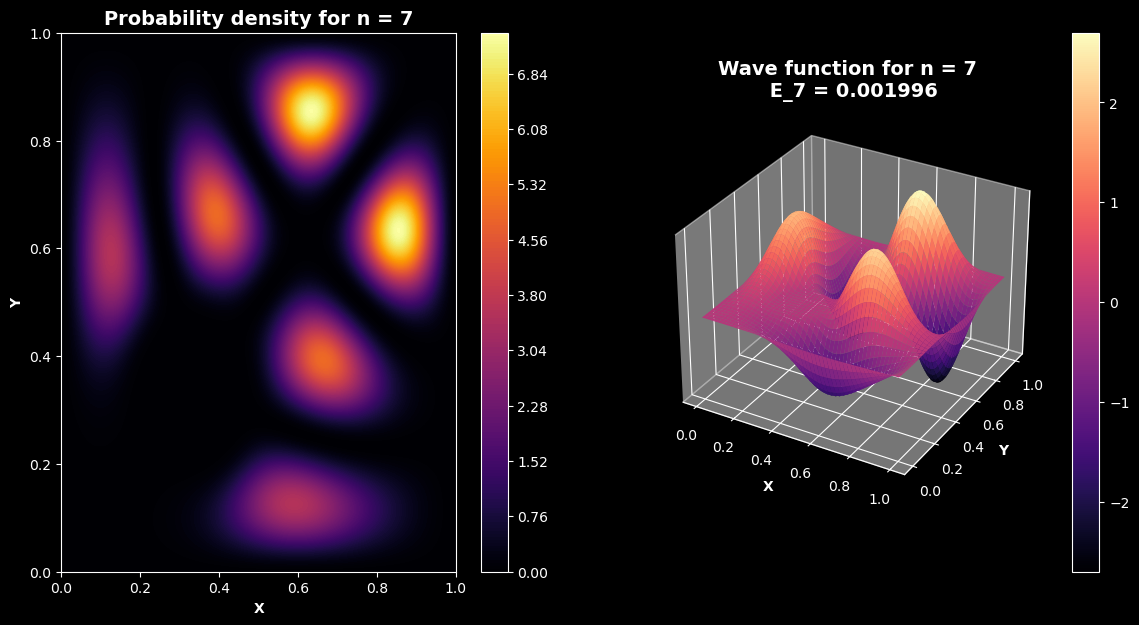

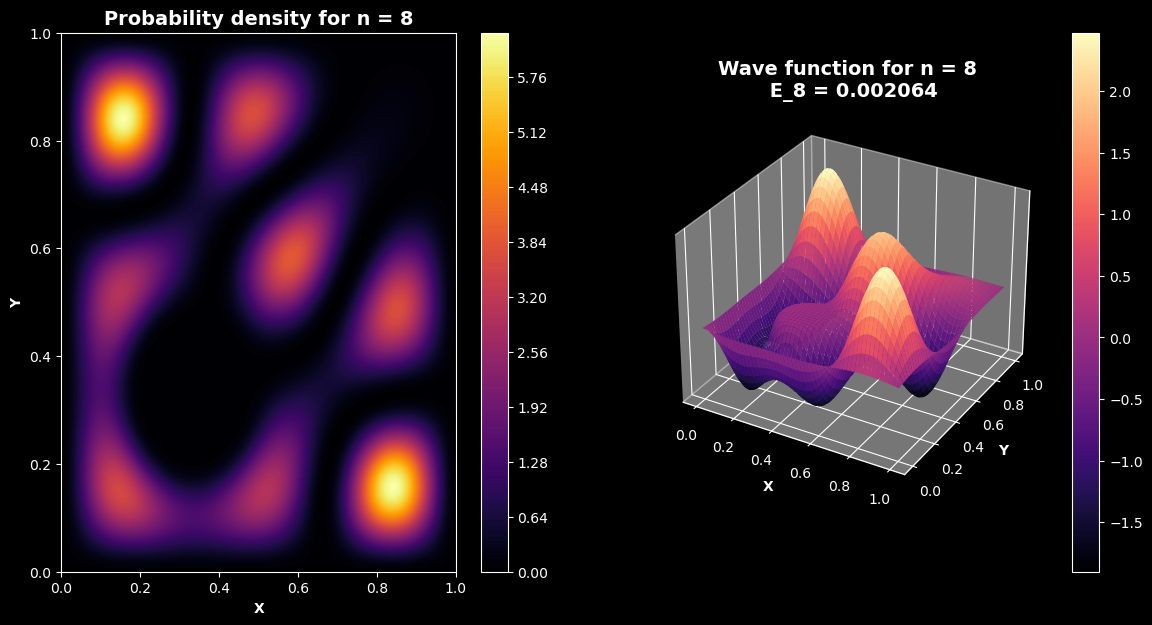

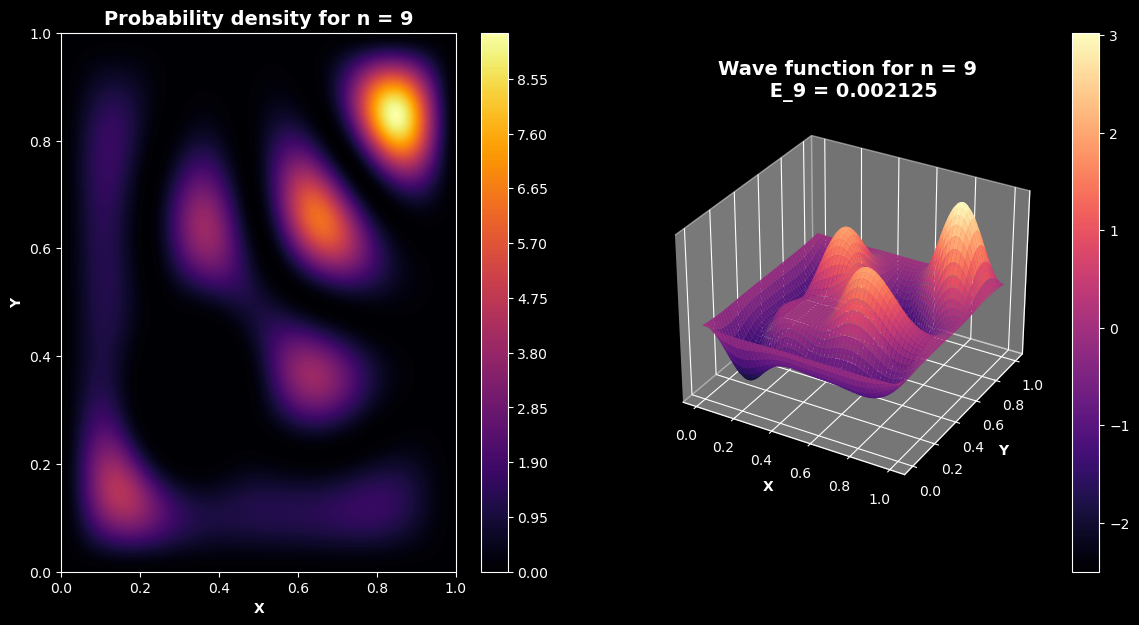

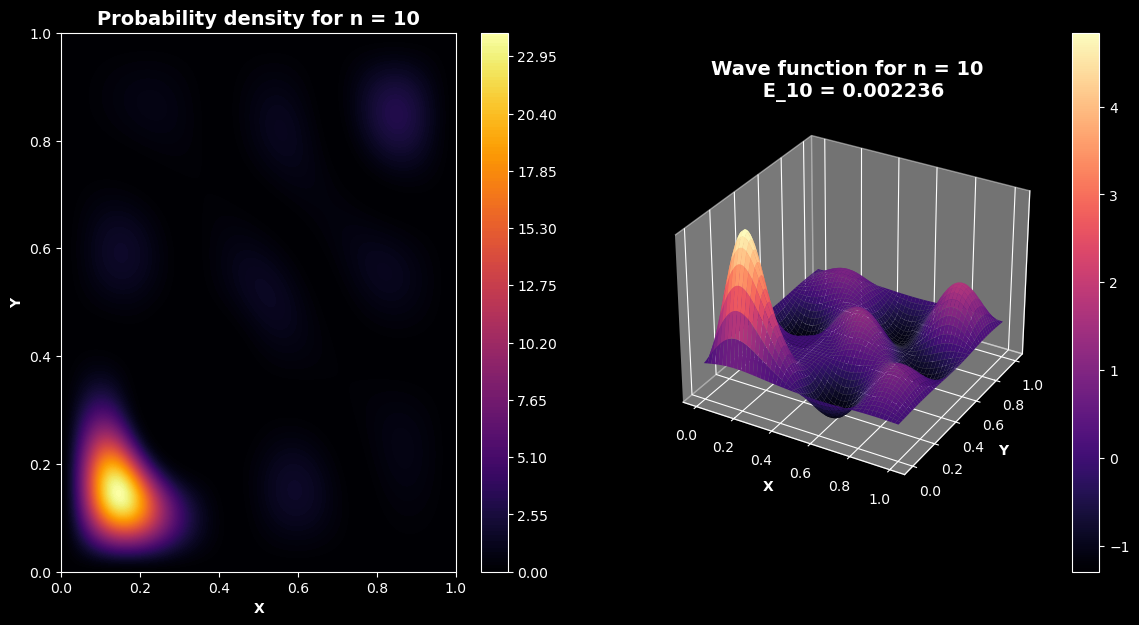

In [9]:
# plotting the results
plotter(eigenvalues, eigenfunctions)

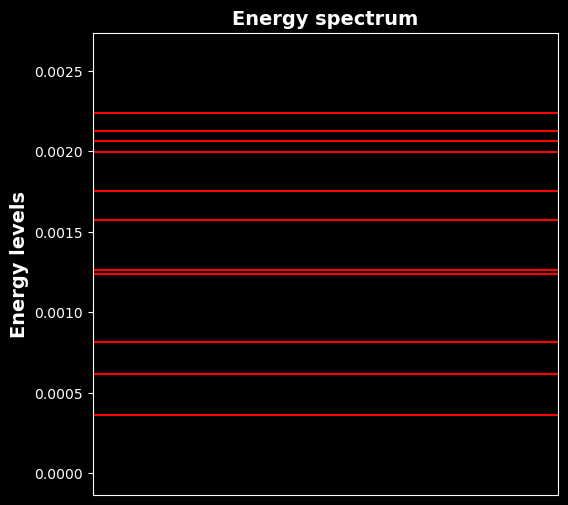

In [10]:
# Plotting the energy levels
energy_spectrum(eigenvalues)

In [11]:
# Defining the circular well
V = lambda x, y: where((x - (L / 2)) ** 2 + (y - (L / 2)) ** 2 <= (L / 2) ** 2, 0, 1e+06)
V = V(x, y)

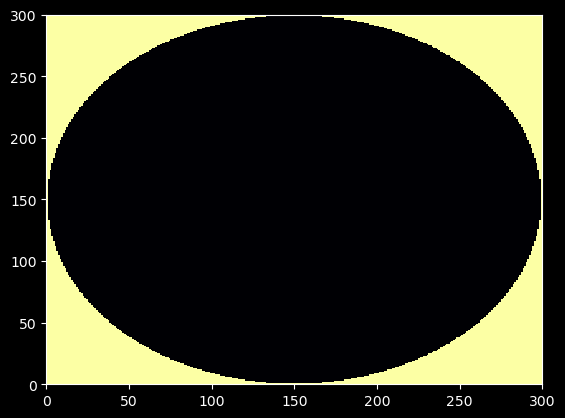

In [12]:
# plotting the circular well
plt.pcolormesh(V, cmap = "inferno")
plt.show()

In [13]:
# Solving again the Schrodinger equation
eigenvalues, eigenfunctions = solver(V)

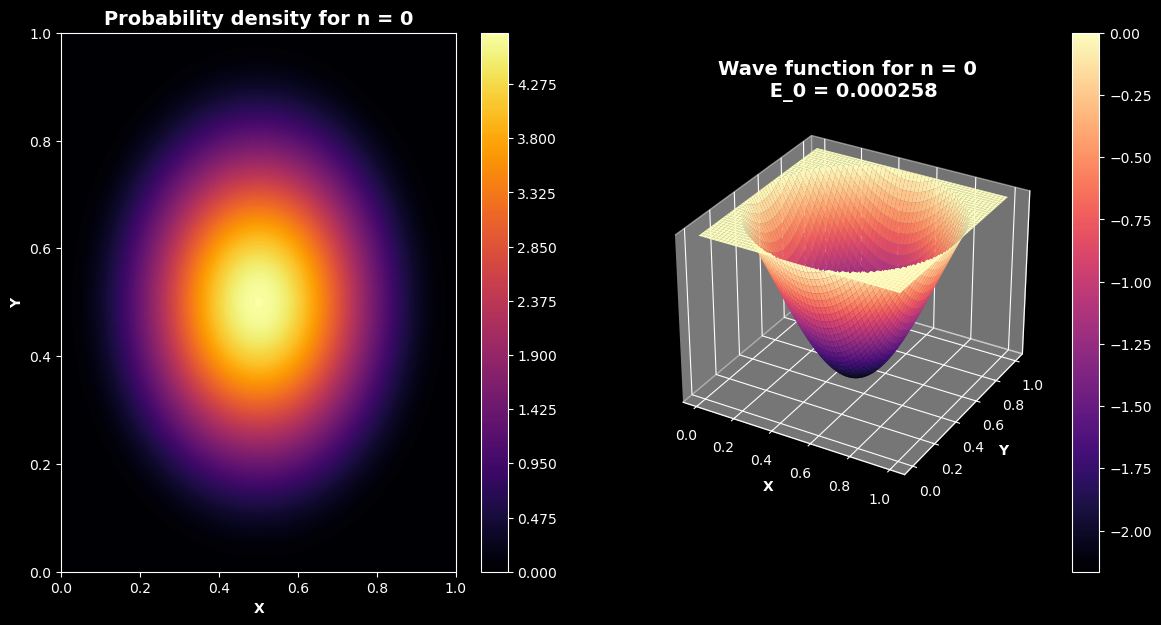

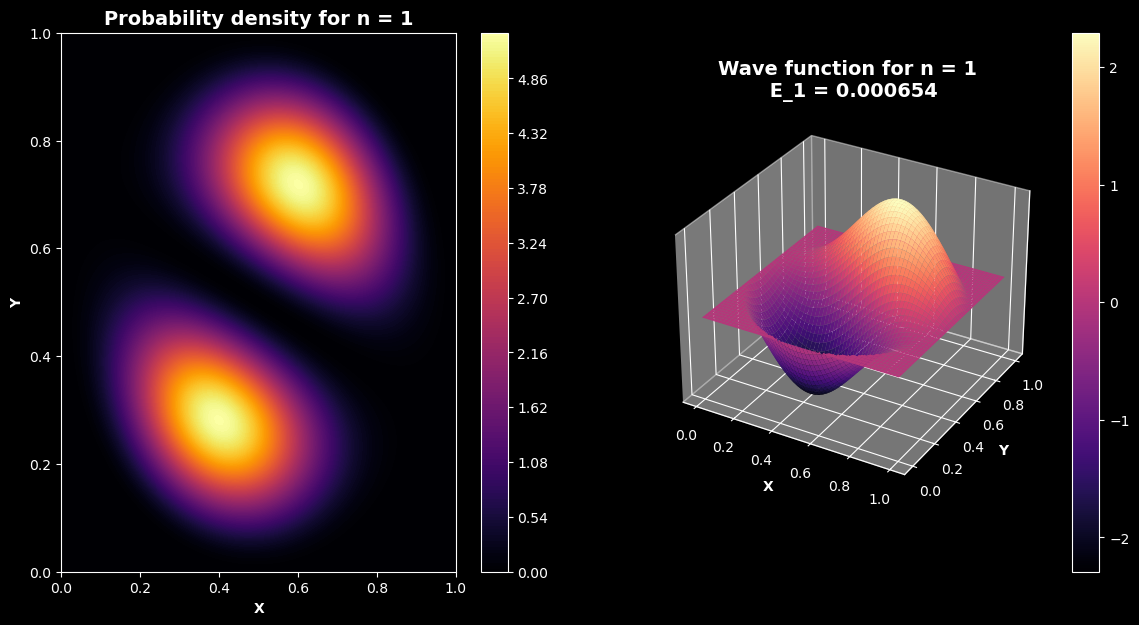

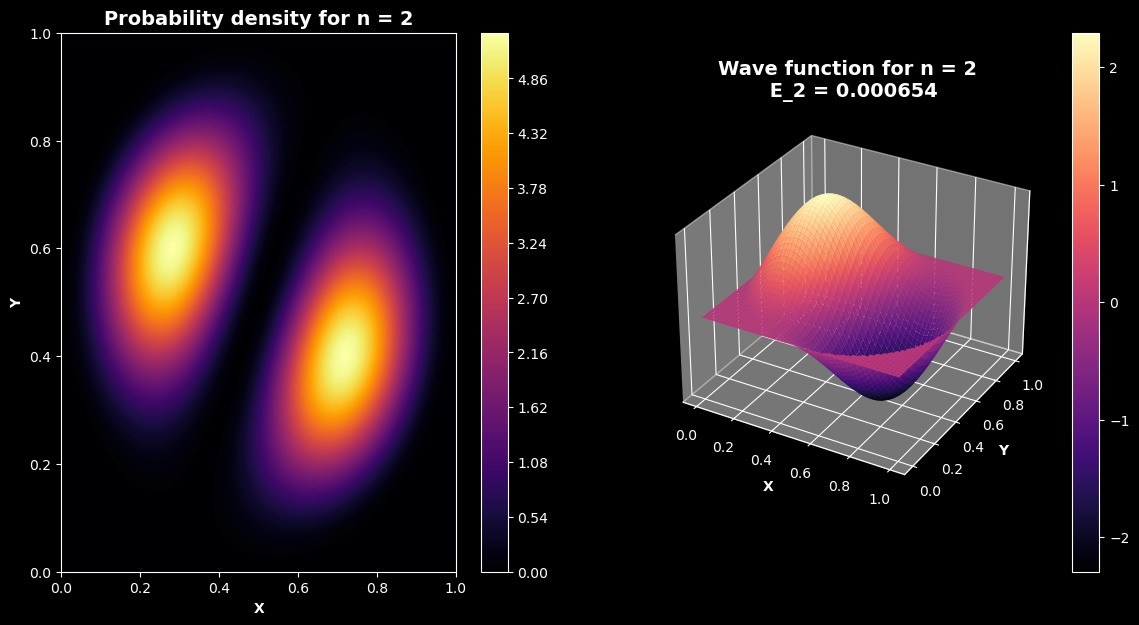

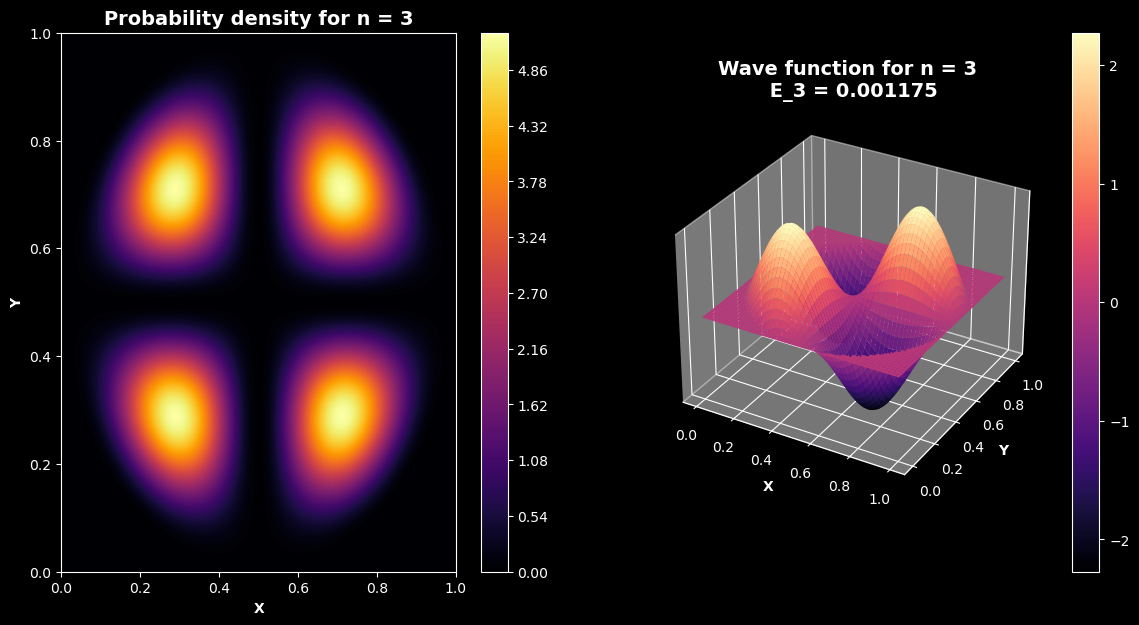

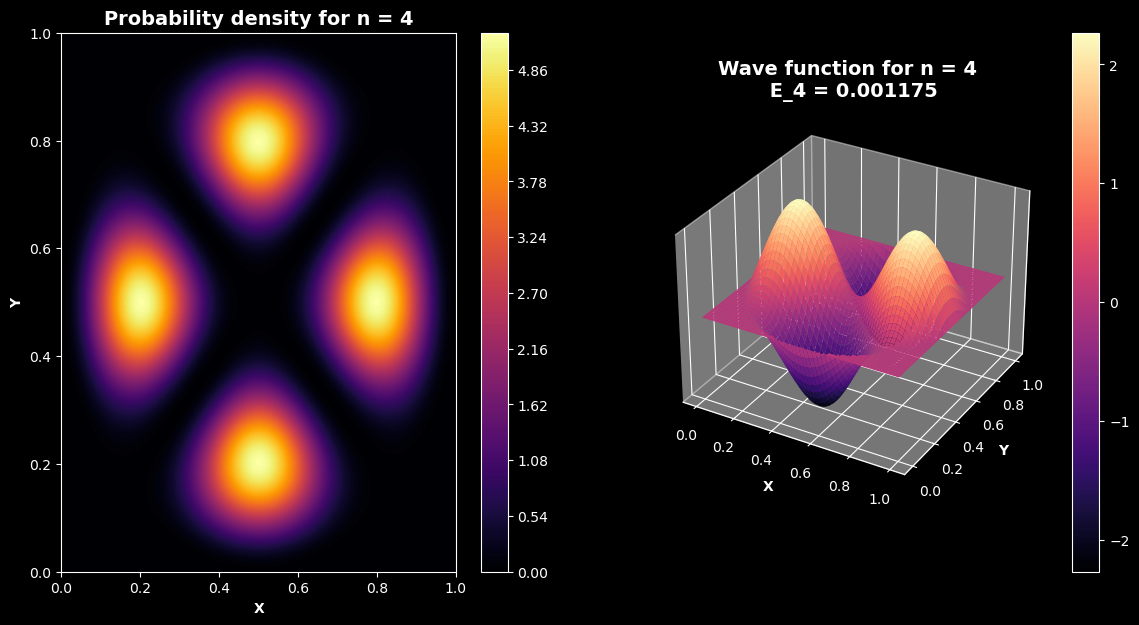

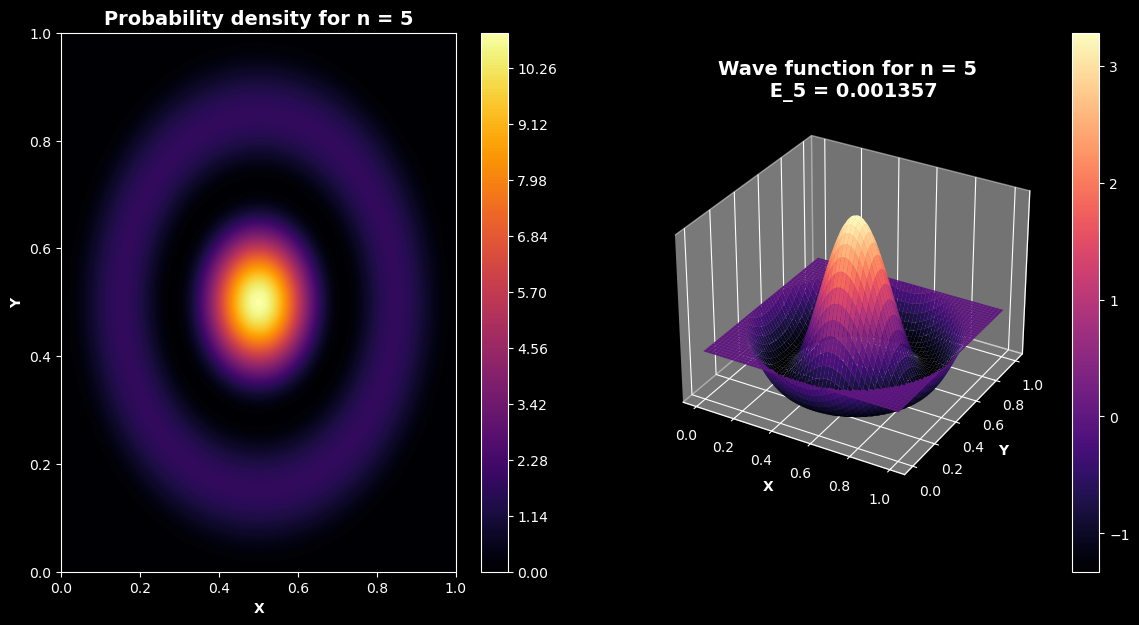

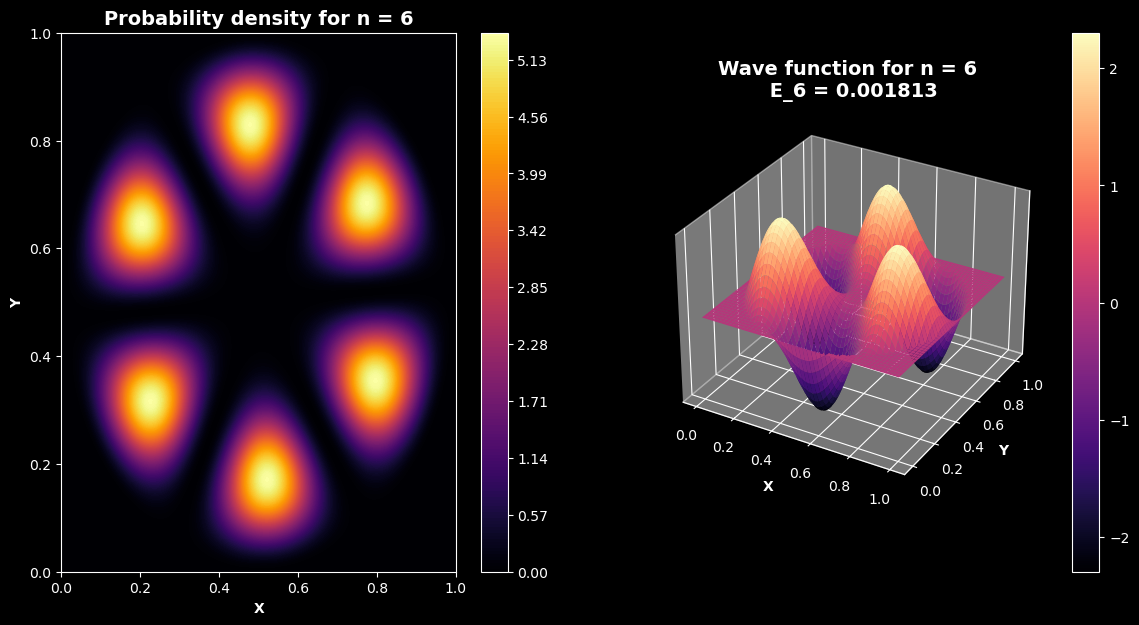

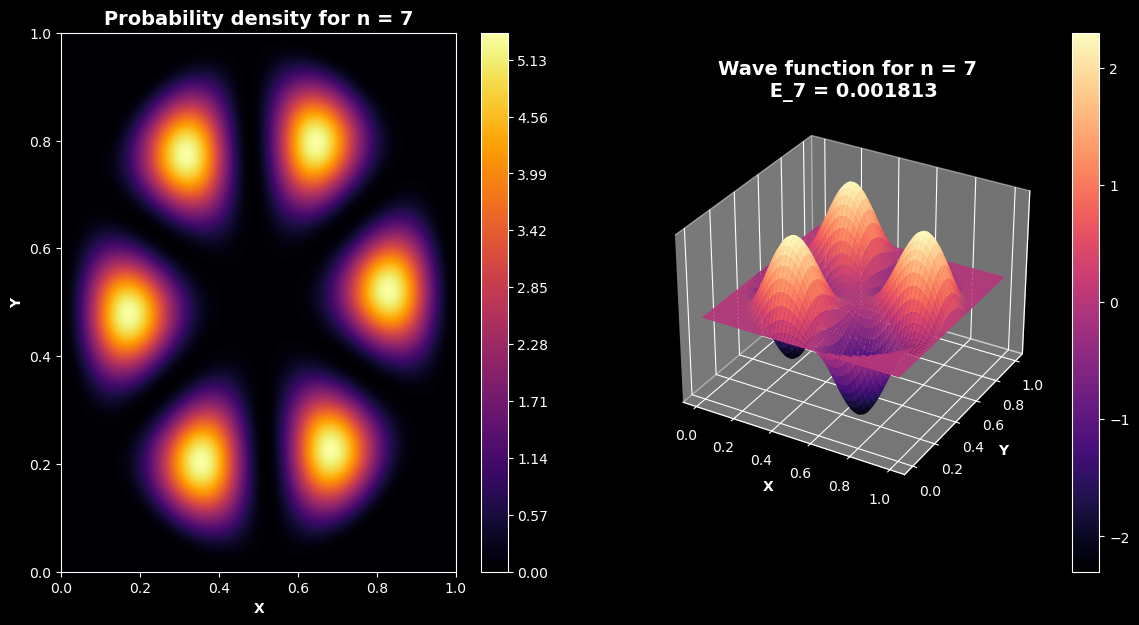

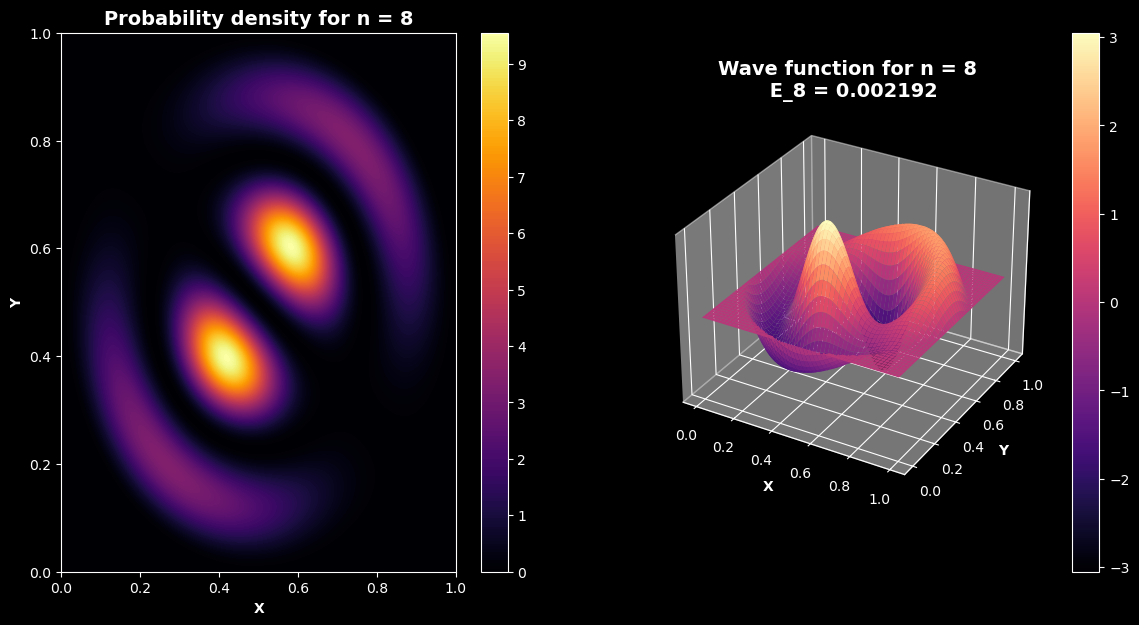

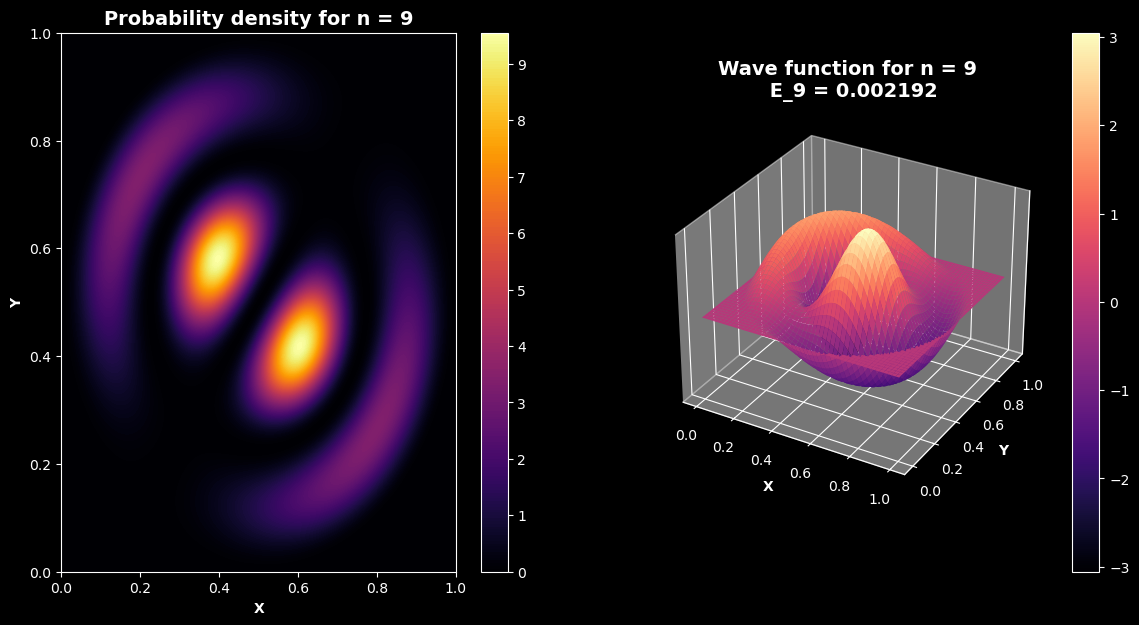

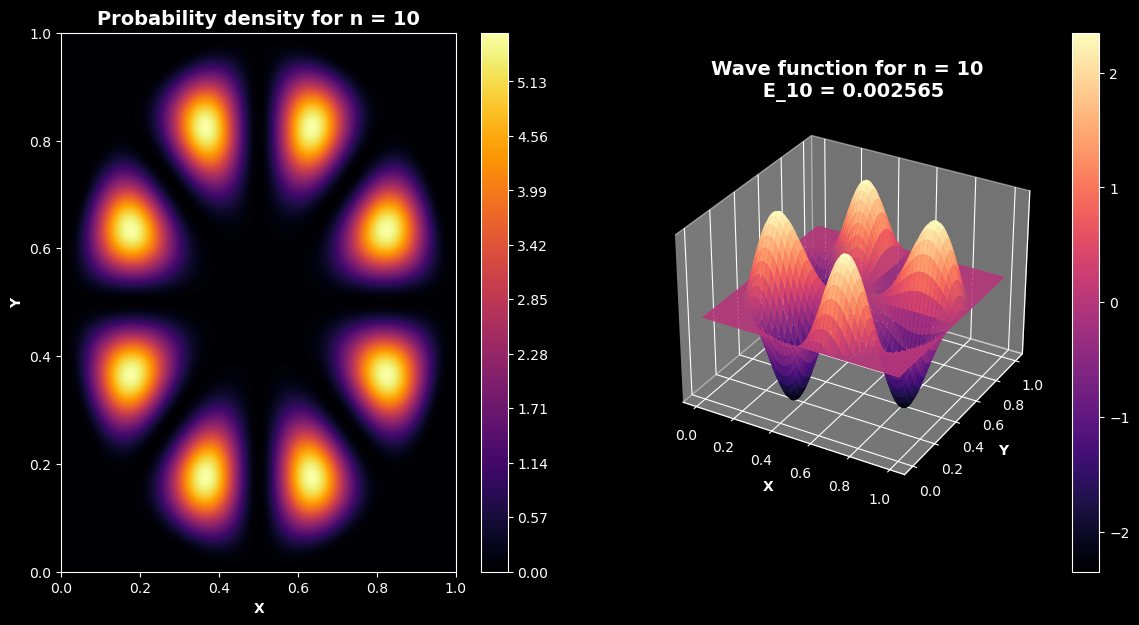

In [14]:
# plotting the results
plotter(eigenvalues, eigenfunctions)

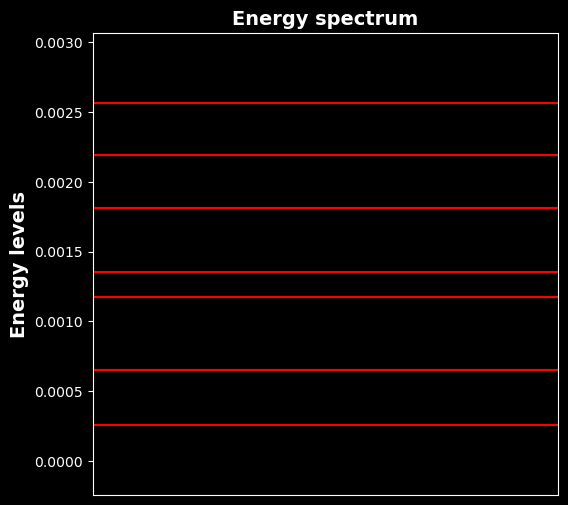

In [15]:
# Plotting the energy spectrum
energy_spectrum(eigenvalues)

In [16]:
# Defining the armonic potential 
V = lambda x, y: (1 / 4) * ((x - (L / 2)) ** 2 + (y - (L / 2)) ** 2)
V = V(x, y)

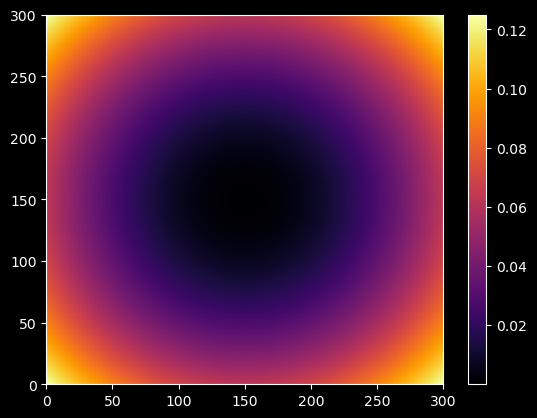

In [17]:
# plotting the armonic potential
plt.pcolormesh(V, cmap = "inferno")
plt.colorbar()
plt.show()

In [18]:
# Solving again the Schrodinger equation
eigenvalues, eigenfunctions = solver(V)

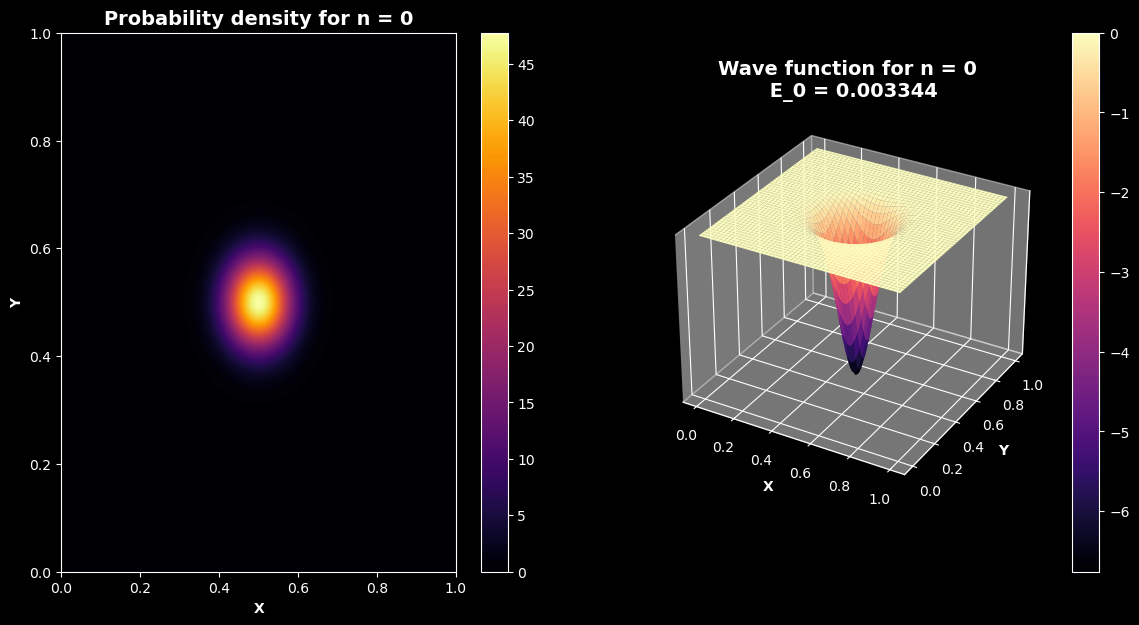

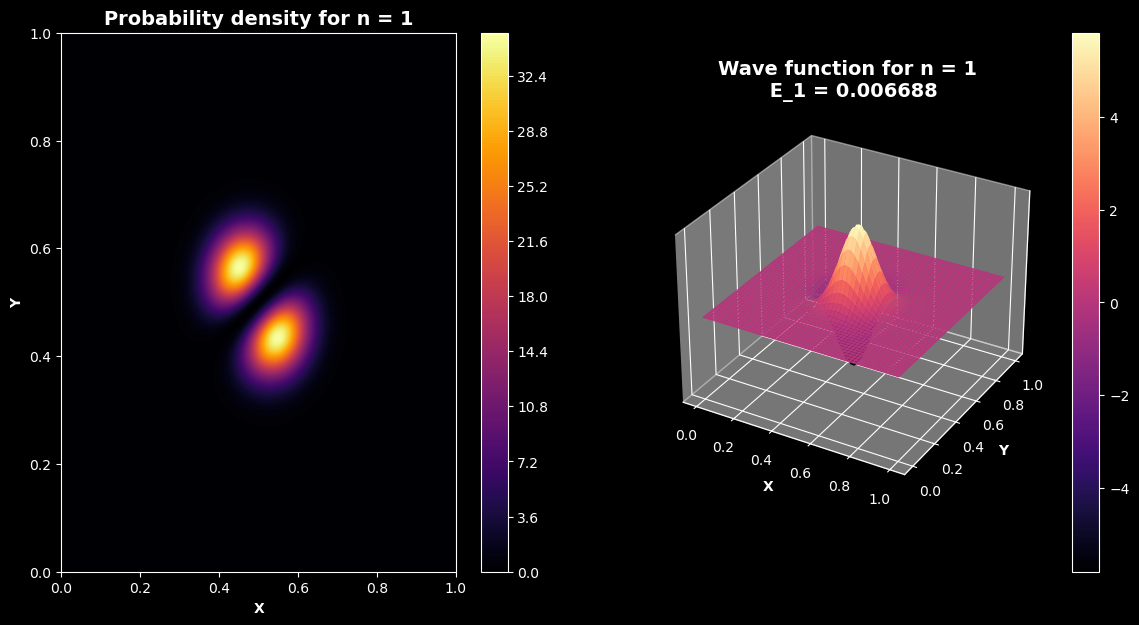

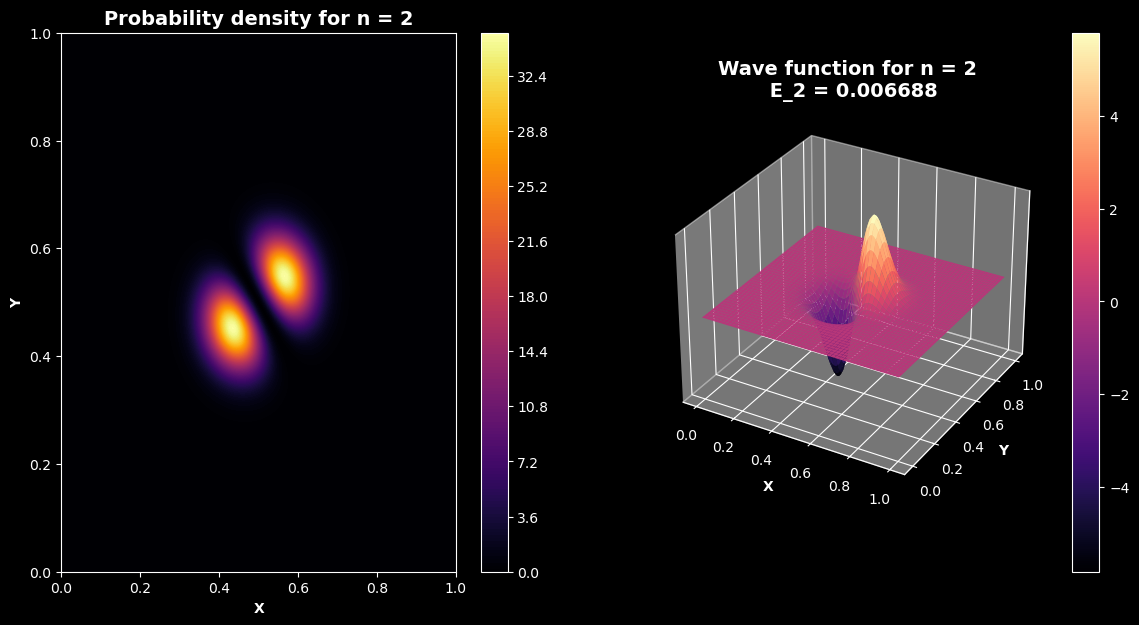

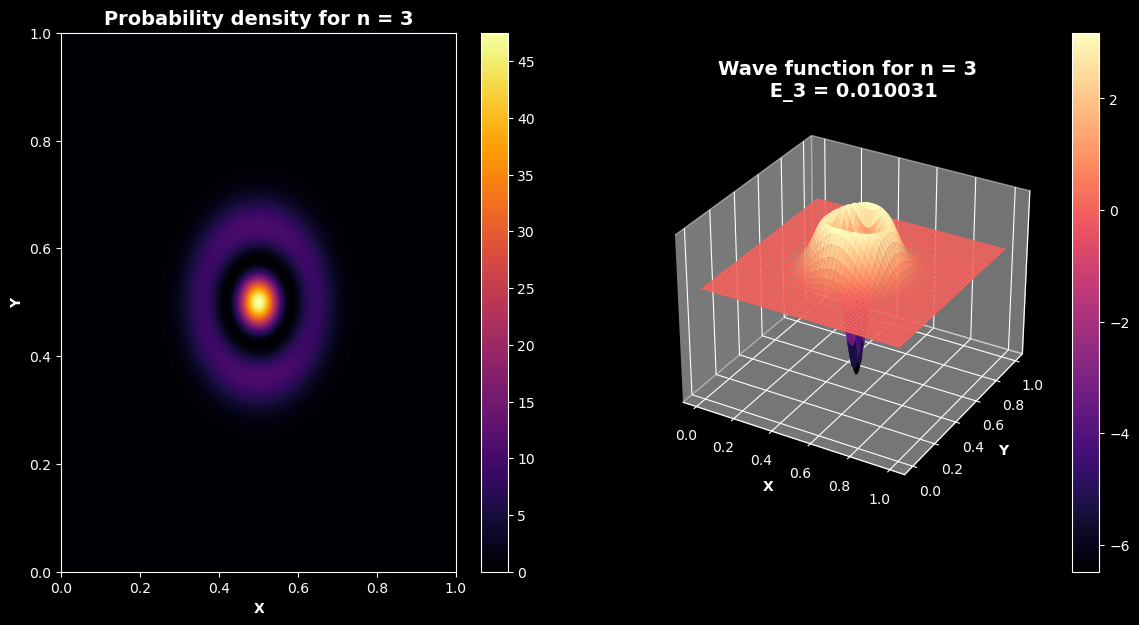

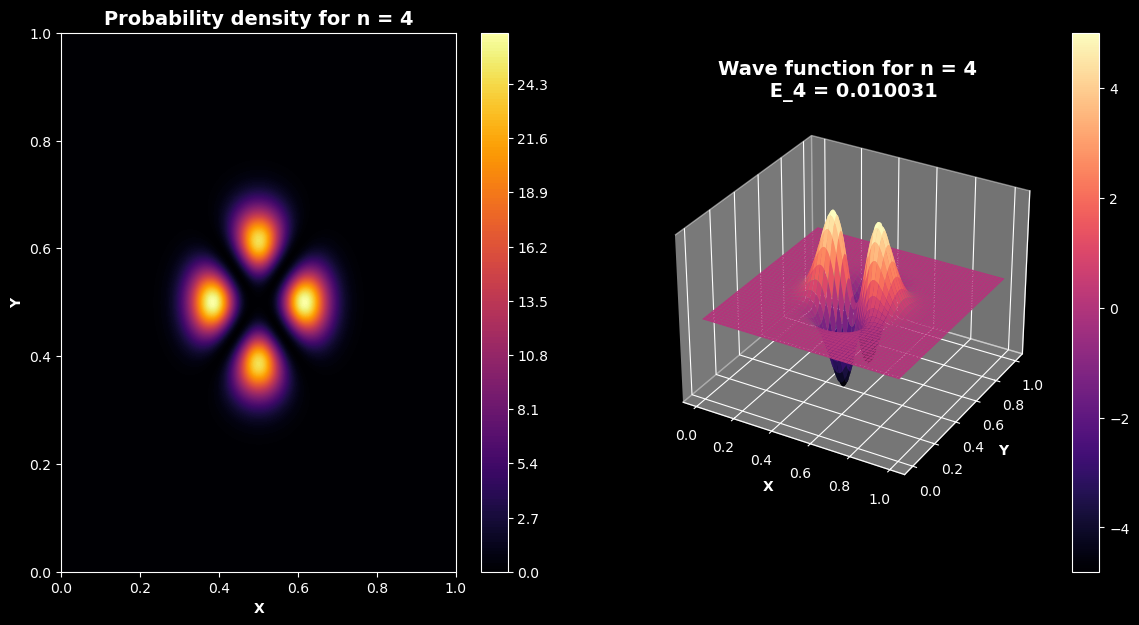

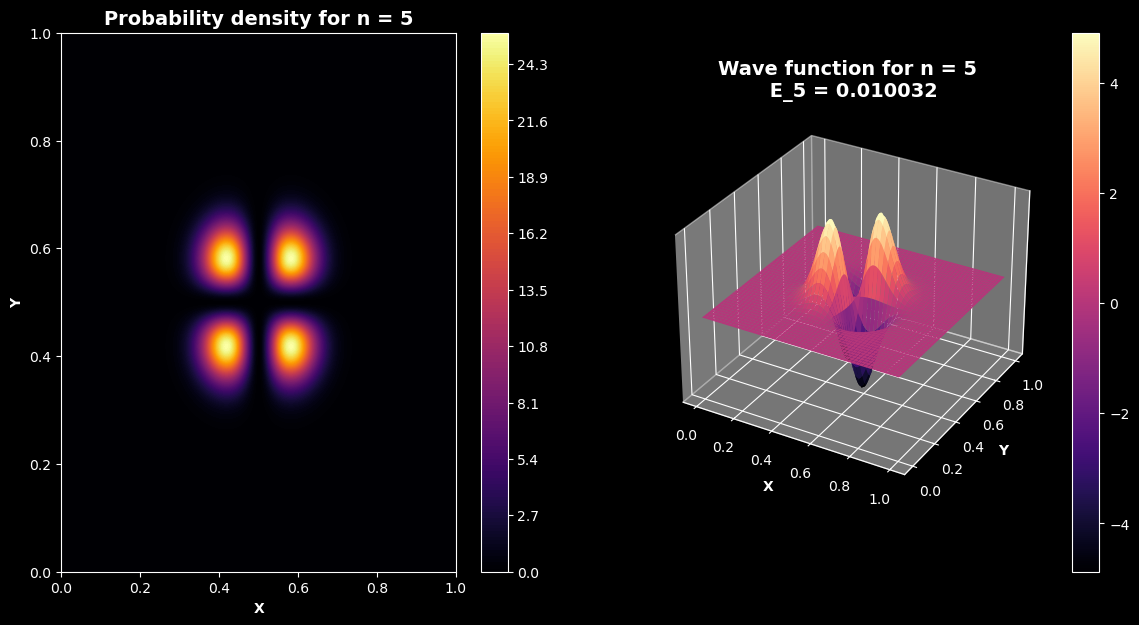

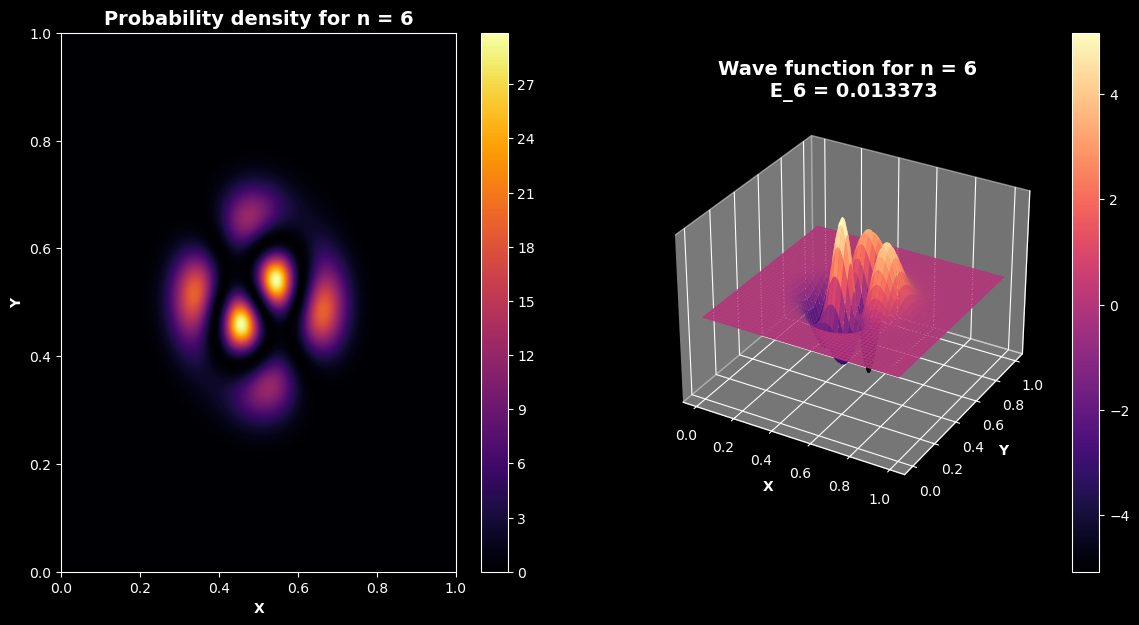

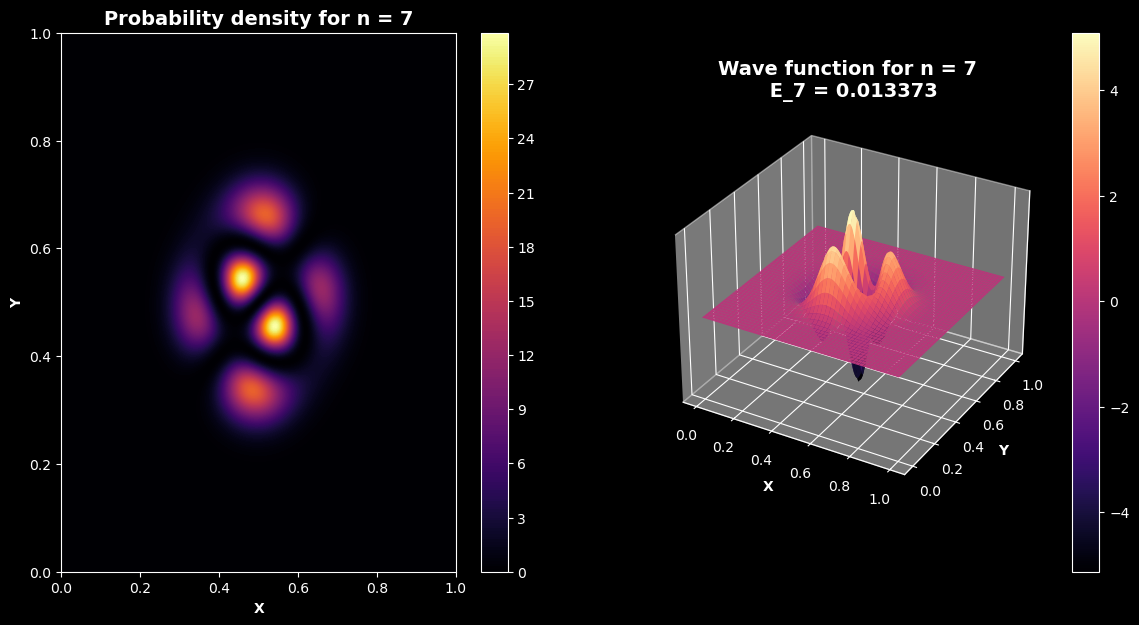

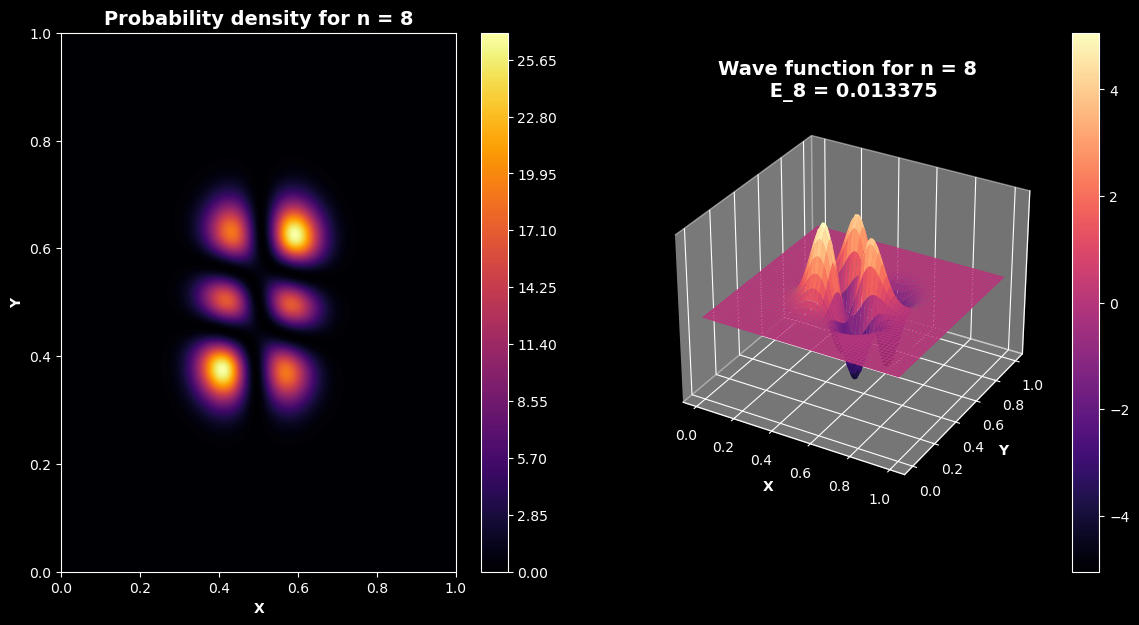

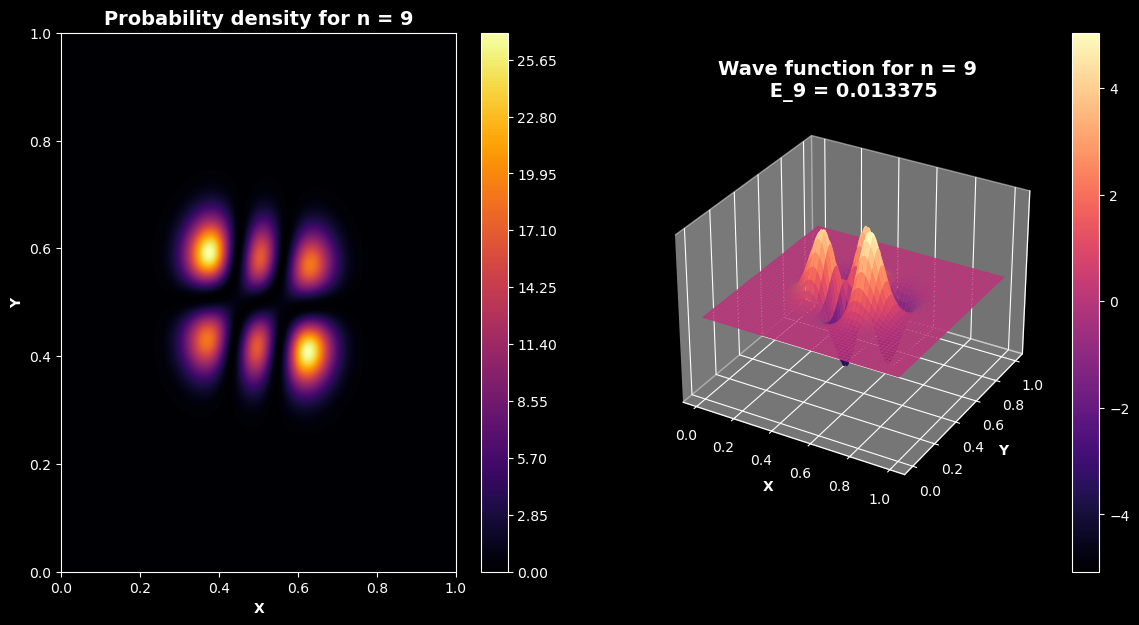

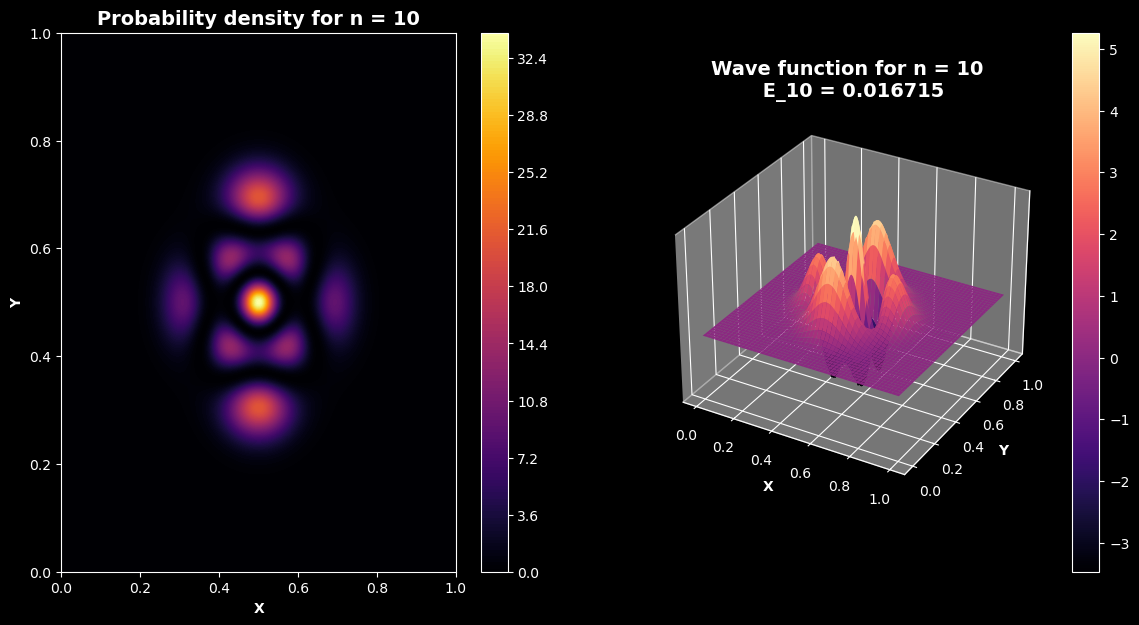

In [19]:
# plotting the results
plotter(eigenvalues, eigenfunctions)

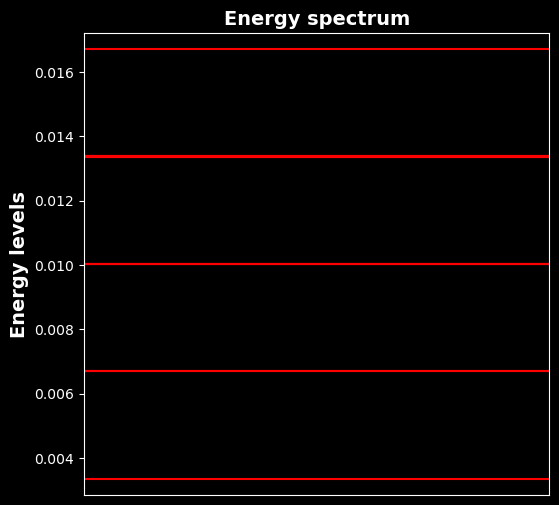

In [20]:
# Plotting the energy spectrum
energy_spectrum(eigenvalues)